<a href="https://colab.research.google.com/github/natitedros/CNN-Playground/blob/main/digit_recognizer_federated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras import layers, models, utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype("float32") / 255.0

# Print training shape & samples
print("X_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
print("Y value before transformation: ", y_train[0])
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
print("Y value after transformation: ", y_train[0])

X_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples
Y value before transformation:  5
Y value after transformation:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


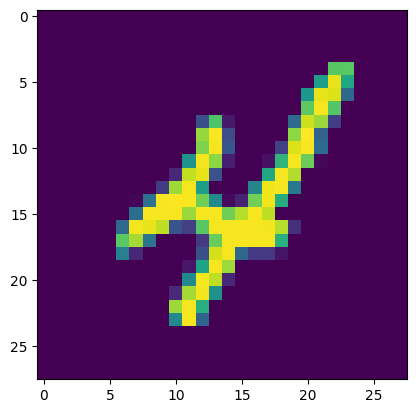

In [7]:
# displaying a random image in the training set
plt.imshow(x_train[9])

In [8]:
x_train_splits = np.array_split(x_train, 4)
y_train_splits = np.array_split(y_train, 4)

In [9]:
x_train_splits[0].shape

(15000, 28, 28, 1)

In [10]:
# Creating a model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        # Dropout for regularization and avoiding overfitting
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [11]:
model = []
for i in range(4):
    model.append(create_model())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Getting Model 1 summary
model[0].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compiling models
for i in range(4):
  model[i].compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Training the local models

# batch size is the number of data instances to train at once before updating the weights
# not related with pixel size. Usually assigned powers of 2 numbers for hardware efficiency
batch_size = 128
epochs = 5

for i in range(4):
    print("Training %s model: " % (i))
    model[i].fit(x_train_splits[i], y_train_splits[i], validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs)

Training 0 model: 
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.6782 - loss: 1.0627 - val_accuracy: 0.9286 - val_loss: 0.2455
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9150 - loss: 0.2920 - val_accuracy: 0.9572 - val_loss: 0.1479
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9426 - loss: 0.1925 - val_accuracy: 0.9647 - val_loss: 0.1157
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.9537 - loss: 0.1529 - val_accuracy: 0.9705 - val_loss: 0.0939
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9634 - loss: 0.1268 - val_accuracy: 0.9723 - val_loss: 0.0898
Training 1 model: 
Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.6984 - loss: 1.0061 - val_accuracy: 0.9318 - val_loss: 0.2301
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9174 - loss: 0.2735 - val_accuracy: 0.9572 - val_loss: 0.1404
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 

In [15]:
for i in range(4):
    print("Evaluating %s model: " % (i))
    score = model[i].evaluate(x_test, y_test)

    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])

Evaluating 0 model: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9653 - loss: 0.1080
Test loss:  0.089832603931427
Test accuracy:  0.9722999930381775
Evaluating 1 model: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9645 - loss: 0.1023
Test loss:  0.08647620677947998
Test accuracy:  0.9714999794960022
Evaluating 2 model: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9646 - loss: 0.1040
Test loss:  0.08699071407318115
Test accuracy:  0.972100019454956
Evaluating 3 model: 
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9673 - loss: 0.0984
Test loss:  0.08072414249181747
Test accuracy:  0.9743000268936157


In [30]:
# Getting the weights
w0 = model[0].get_weights()
w1 = model[1].get_weights()
w2 = model[2].get_weights()
w3 = model[3].get_weights()

print(f"w0: {len(w0)} arrays with shapes: {[w.shape for w in w0]}")
print(f"w1: {len(w1)} arrays with shapes: {[w.shape for w in w1]}")
print(f"w2: {len(w2)} arrays with shapes: {[w.shape for w in w2]}")
print(f"w3: {len(w3)} arrays with shapes: {[w.shape for w in w3]}")

pairwise_dist = np.array([w0, w1, w2, w3], dtype=object)

w0: 6 arrays with shapes: [(3, 3, 1, 32), (32,), (5408, 128), (128,), (128, 10), (10,)]
w1: 6 arrays with shapes: [(3, 3, 1, 32), (32,), (5408, 128), (128,), (128, 10), (10,)]
w2: 6 arrays with shapes: [(3, 3, 1, 32), (32,), (5408, 128), (128,), (128, 10), (10,)]
w3: 6 arrays with shapes: [(3, 3, 1, 32), (32,), (5408, 128), (128,), (128, 10), (10,)]


In [31]:
avg_weights = np.average(pairwise_dist, axis=0)
avg_weights[0].shape

(3, 3, 1, 32)

In [34]:
# Create a new model with the same architecture as model[0]
avg_model = create_model()

avg_model.set_weights(avg_weights)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
def predict_number(model, image):

    predicted_probabilities = model.predict(image)
    predicted_class = np.argmax(predicted_probabilities)
    return predicted_class

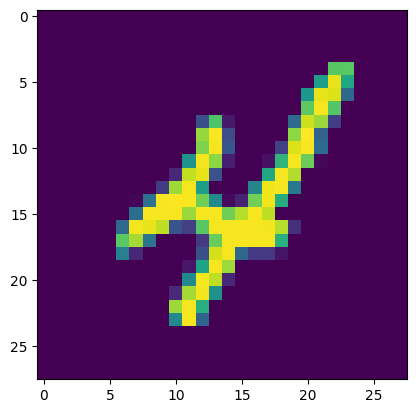

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Digit: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Digit model 0: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Digit model 1: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted Digit model 2: 4


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Digit model 3: 4


In [39]:
# Display an image from the training dataset
plt.imshow(x_train[9])
plt.show()

# Classify the digit of the displayed image
image_to_classify = x_train[9].reshape((1, 28, 28, 1))


predicted_class = predict_number(avg_model, image_to_classify)

# Display the predicted class
print("Predicted Digit:", predicted_class)
predicted_class = predict_number(model[0], image_to_classify)
print("Predicted Digit model 0:", predicted_class)
predicted_class = predict_number(model[1], image_to_classify)
print("Predicted Digit model 1:", predicted_class)
predicted_class = predict_number(model[2], image_to_classify)
print("Predicted Digit model 2:", predicted_class)
predicted_class = predict_number(model[3], image_to_classify)
print("Predicted Digit model 3:", predicted_class)